# Machine Learning and Statistics
## Winter Semester 2023
***

This notebook contains the solutions for five tasks relating to each of the five topics covered during this module. 

***

# Task 1
***
#### Write a function sqrt(x) to approximate the square root of a floating point number x without using the power operator or a package
***

### Newton's Method for Square Root Approximation

Newton's method, also known as the Newton-Raphson method, is an iterative numerical technique for finding roots of equations.  Specifically, when applied to the square root problem, the method starts with an initial guess and refines it through successive iterations to converge towards the square root of a given number. 

Newton's method is based on tangent lines.  The premise being that if x is close enough to the root of f(x), the tangent of the graph will intersect the x-axis at a point (x, f(x)) which is closer to the root than x, in other words, each successive guess will draw closer to the actual answer.  This iterative formula is as follows:

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

GeekforGeeks consider the Newton Raphson Method advantageous for solving non-linear equations, non-linear differential and non-linear integral equations.  The order of convergence is quadric i.e. of second order which makes this method fast as compared to other methods and it is easy to implement in computing.

Disadvantages of Newton Raphson Method include complexities which arise if the derivative of the function f(x) is not simple. Additionally, in each iteration, two quantities f(x) and f'(x) have to be evaluated.  Depending on the number of iterations, it may not always converge. 

The below code is a simple python implementation of the Newton-Raphson method to find the root of a given function. The user provides an initial guess, a tolerable error, and a maximum number of steps for the algorithm. The defined function `newtonRaphson`takes the three user inputs and iteratively applies the formula within the function, looping until either the root is found or the maximum number of iterations is reached. 

In [1]:
# code taken from https://www.codesansar.com/numerical-methods/newton-raphson-method-python-program.htm
# Defining Function
def f(x):
    return x**3 - 5*x - 9

# Defining derivative of function
def g(x):
    return 3*x**2 - 5

# Implementing Newton Raphson Method

def newtonRaphson(x0,e,N):
    print('\n\n*** NEWTON RAPHSON METHOD IMPLEMENTATION ***')
    step = 1
    flag = 1
    condition = True
    while condition:
        if g(x0) == 0.0:
            print('Divide by zero error!')
            break
        
        x1 = x0 - f(x0)/g(x0)
        print('Iteration-%d, x1 = %0.6f and f(x1) = %0.6f' % (step, x1, f(x1)))
        x0 = x1
        step = step + 1
        
        if step > N:
            flag = 0
            break
        
        condition = abs(f(x1)) > e
    
    if flag==1:
        print('\nRequired root is: %0.8f' % x1)
    else:
        print('\nNot Convergent.')


# Input Section
x0 = input('Enter Guess: ')
e = input('Tolerable Error: ')
N = input('Maximum Step: ')

# Converting x0 and e to float
x0 = float(x0)
e = float(e)

# Converting N to integer
N = int(N)

# Starting Newton Raphson Method
newtonRaphson(x0,e,N)

Enter Guess:  2.8
Tolerable Error:  0.0001
Maximum Step:  10




*** NEWTON RAPHSON METHOD IMPLEMENTATION ***
Iteration-1, x1 = 2.856587 and f(x1) = 0.027079
Iteration-2, x1 = 2.855197 and f(x1) = 0.000017

Required root is: 2.85519739


This second block of code is more concise and encapsulates the entire process within a single recursive function checking the tolerance condition within the function itself and returns the result when the condition is satisfied.  The initial guess in this code is automatically set to half of the input number and has a hardcoded tolerance.  I understand that there are schools of thought that recursion is a poor approach in Python - perceived as slower than an iterative solution and because Python's recursion depth is limited to 1000 there is potential for stack overflow (although the recursion depth can be reset to a higher number). 

In [2]:
# read in the variables needed to perform the calculation
num = 10 # I have hardcoded the input number as 10
given = num/2
tol = 0.0001 # set the tolerance

# this function will loop the iteration until the tolerance is reached
def sqRoot(x):
    if((x * x > num - tol) and (x * x <= num + tol)):
        return x
    x = (x + num/x)/2
    return sqRoot(x)

# call the function
root = sqRoot(given)

# rounding the output so that it is more approximate!
roundRoot = round(root, 2)

print("The square root of {} is approximately {}".format(num,roundRoot))

The square root of 10 is approximately 3.16


### REFERENCES:
* https://hackernoon.com/calculating-the-square-root-of-a-number-using-the-newton-raphson-method-a-how-to-guide-yr4e32zo
* https://www.geeksforgeeks.org/program-for-newton-raphson-method/
* https://data-flair.training/blogs/python-function/
* https://stackoverflow.com/questions/16005123/how-can-i-make-a-recursive-square-root-in-python#:~:text=The%20basic%20strategy%20for%20a,the%20true%20root%20to%20return.
* https://stackoverflow.com/questions/48823833/simple-program-to-find-squre-root-using-recursion/48823931
* https://beapython.dev/2020/05/14/is-recursion-bad-in-python/#:~:text=Recursion%20can%20be%20considered%20bad,calls%20on%20the%20call%20stack.
* https://stackoverflow.com/questions/4278327/danger-of-recursive-functions  

# Task 2
***
#### Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. Use scipy.stats to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.
***

In [22]:
from scipy.stats import chi2_contingency

# Define the contingency table with labels
contingency_table = [
    ['Drink', 'Biscuit', 'Count'],  # Column labels
    ['Coffee', 'Chocolate', 43],    # Row 1
    ['Coffee', 'Plain', 57],        # Row 2
    ['Tea', 'Chocolate', 56],       # Row 3
    ['Tea', 'Plain', 45],           # Row 4
]

# Extracting the actual data (excluding column labels)
data = [row[2] for row in contingency_table[1:]]

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency([data[:2], data[2:]])

# Print results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the results
alpha = 0.05
print("\nSignificance Test:")
if p <= alpha:
    print("There is evidence of an association between drink preference and biscuit preference.")
else:
    print("There is no evidence of an association between drink preference and biscuit preference.")


Chi-squared statistic: 2.6359100836554257
P-value: 0.10447218120907394

Significance Test:
There is no evidence of an association between drink preference and biscuit preference.


### Method

First I created a contingency table using a list of lists. Column labels are ['Drink', 'Biscuit', 'Count'] and the rows represent different combinations of drink and biscuit preferences, with corresponding counts.

I then extracted the actual count values from the rows of the contingency table and excluded the column labels from the data.

I used `chi2_contingency` from `scipy.stats` to perform a chi-squared test on the data.  The function expects a 2D array or contingency table, so I split the data into two lists representing the counts for 'Chocolate' and 'Plain' biscuits.

Having obtained the chi-squared statistic and p-value from the test, the findings are printed using print statements.  

The chi-squared statistic is used to quantify the difference between the observed and expected frequencies in a contingency table. In the context of the chi-squared test of independence, the statistic is used to assess whether there is a significant association between the categorical variables represented in the table.

If the p-value is less than or equal to the signifiance level (`alpha`), it suggests evidence to reject the null hypothesis, indicating an association.  Otherwise, there is no evidence of an association.  For my purposes I have used the standard significance level of 0.05.  

### Finding
The P value here is 0.10447218120907394, well above the significance level of 0.05 indicating that there is no correlation between a persons preferred drink (tea or coffee) and the type of biscuit they prefer (chocolate/plain). 


### REFERENCES:
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
* https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
* https://analyticsindiamag.com/a-beginners-guide-to-chi-square-test-in-python-from-scratch/
* https://stats.stackexchange.com/questions/104468/understanding-the-chi-squared-test-and-the-chi-squared-distribution

# Task 3
***
#### Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo 
***

The Palmers Penguin dataset contains data for 344 penguins across 3 different species of penguins, collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, from 3 islands in the Palmer Archipelago, Antarctica. The below code loads the dataset, filters it down to only the Gentoo penguins, separates them by sex and using the t-test function from scipy.stats, the test compares the means of two independent samples (male and female body masses) to determine if there's a significant difference.

A t-test is a statistical test used to determine if there is a significant difference between the means of two sets of data. It calculates a t-statistic and a p-value. The t-statistic represents the difference between the means of the two groups in terms of standard error. The p-value is the probability of observing a t-statistic as extreme as the one calculated, assuming that the null hypothesis is true.

If the p-value is less than a chosen significance level (commonly 0.05 and in my code it is called 'alpha'), the null hypothesis is rejected.

If the p-value is greater than the significance level, you fail to reject the null hypothesis. For the purposes of the exercise at hand this can be summarised as follows:

Null Hypothesis (H0): There is no significant difference in body mass between male and female Gentoo penguins.

Alternative Hypothesis (H1): There is a significant difference in body mass between male and female Gentoo penguins.d female Gentoo penguins."


In [10]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Load the penguins dataset
penguins = pd.read_csv('penguins.csv')

In [11]:
penguins.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [12]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


Each float category column is missing 2 null observations and the sex column is missing 11.

In [13]:
# Filter data for only Gentoo penguins
gentoo_penguins = penguins[penguins['species'] == 'Gentoo']

In [14]:
# show rows with NaN values
gentoo_penguins[gentoo_penguins.isnull().any(axis=1)]

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
178,179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009
271,272,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


T-statistic: 14.721676481405709
P-value: 2.133687602018886e-28
--------------------------------------------------
There is evidence of a significant difference in body mass between male and female Gentoo penguins.
--------------------------------------------------


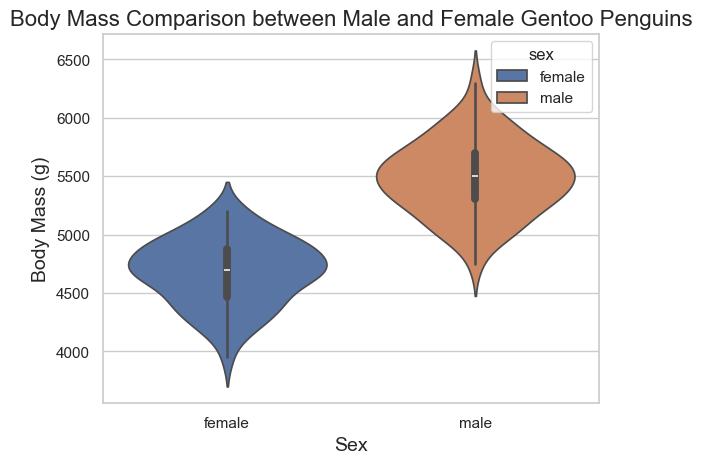

In [21]:
# Separate data for male and female Gentoo penguins
male_data = gentoo_penguins[gentoo_penguins['sex'] == 'male']['body_mass_g']
female_data = gentoo_penguins[gentoo_penguins['sex'] == 'female']['body_mass_g']

# Perform t-test, ignoring NaN values
t_stat, p_value = ttest_ind(male_data, female_data, nan_policy='omit')

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')
print('-'*50)

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print('There is evidence of a significant difference in body mass between male and female Gentoo penguins.')
    print('-'*50)
else:
    print("There is no significant difference in body mass between male and female Gentoo penguins.")
    print('-'*50)

# Create a violin plot
ax = sns.violinplot(x='sex', y='body_mass_g', data=gentoo_penguins, hue='sex')

# Add title and labels
plt.title('Body Mass Comparison between Male and Female Gentoo Penguins', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Body Mass (g)', fontsize=14)

# Show the plot
plt.show()

The violin plot visually supports the t-test conclusion.  It clearly represents the distribution of body masses and supports the finding that there is notable difference between male and female Gentoo penguins in terms of body mass. 

## References:

* https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.
* https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests
* https://www.pythonfordatascience.org/independent-samples-t-test-python/
* https://www.tutorialspoint.com/how-to-conduct-a-one-sample-t-test-in-python/

# Task 4
***
#### Using the famous iris data set, suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer.
***

The Iris Flower Data Set represents four measurements of floral morphology on 150 plants - 50 individuals for each of three genus (Iris versicolor, Iris setosa, and Iris virginica). The numeric parameters which the dataset contains are sepal width, sepal length, petal width and petal length. The dataset is widely used for teaching machine learning because the data is open source, the accuracy and origin are both known and with an even 50 in each classification it is balanced and has no null or missing values. All measurements are on the same scale (cm) so no normalisation is called for and the file size isn’t unwieldy or excessively complicated. 

#### Load the dataset and libraries and look at initial findings

As a preliminary I will load necessary python libararies and my data file and print to make sure it appears as expected. 

In [23]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns

data = pd.read_csv('iris.csv')
print (data)

     SepalLength  SepalWidth  PetalLength  PetalWidth           Class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


The mean measurements for each of the three species of iris give a good initial indicator of how similar they are. The values for sepal length are similar enough not to clearly distinguish the three classes but we can see that for all of sepal width, petal length and petal width, *iris setosa* is quite different from *iris versicolor* and *iris virginica*.

In [25]:
print ("\n\nThese are the mean measurements for each class:\n")
print(data.groupby("Class").mean())



These are the mean measurements for each class:

                 SepalLength  SepalWidth  PetalLength  PetalWidth
Class                                                            
Iris-setosa            5.006       3.418        1.464       0.244
Iris-versicolor        5.936       2.770        4.260       1.326
Iris-virginica         6.588       2.974        5.552       2.026


#### Visualising Plots

Visualisation is a quick and intuitive way to identify patterns and relationships in a dataset and the Seaborn package offers a range of helpful visualisation plots which may make differences in our three class of iris more immediately apparent.  A **scatterplot** is very useful because it retains the exact data values and sample size and by colour coding the three species of iris in the plots, this distinction is even clearer.  Below, *iris setosa* is represented in blue and is clearly distinguishable from the other two classes across each of the four measurements.

Text(0.5, 0.98, 'Scatterplots of Iris Data Set Variables\n\n')

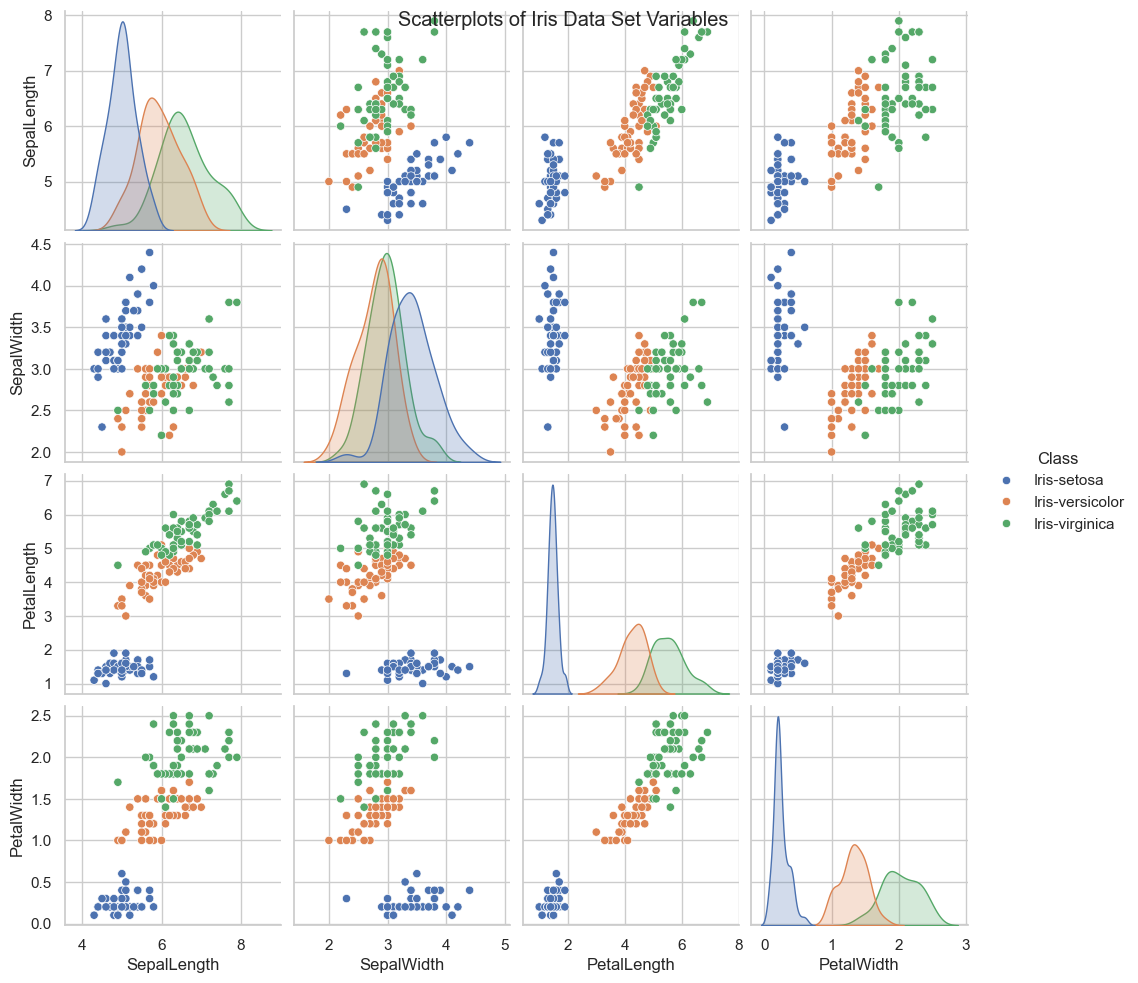

In [26]:
sns.pairplot (data, hue = "Class")
plt.suptitle ("Scatterplots of Iris Data Set Variables\n\n")

A **violin plot** is something of a cross between a box plot and a histogram in that it shows the spread or distribution of the data. The density is 'mirrored' giving the plot its distinctive violin shape. The dot in the middle of each 'violin' is the median value of that particular range.  Below we can clearly see that *iris setosa* is significantly smaller in terms of it's petal length.

Text(0.5, 0.98, 'Violinplot of Iris Data Set Species: Petal Length\n\n')

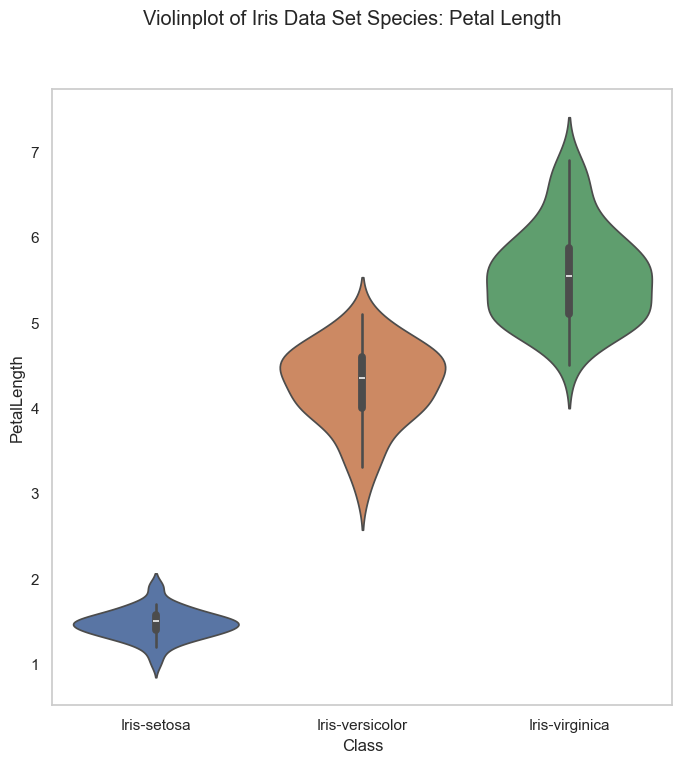

In [27]:
plt.figure(figsize=(8,8))
sns.violinplot(x=data["Class"], y=data["PetalLength"], data=data, hue = "Class")
plt.grid (axis = "y") 
plt.suptitle ("Violinplot of Iris Data Set Species: Petal Length\n\n")

Finally, if we look at **histograms** representing the four measurements across the three classes, while the plots for sepal length and sepal width do show some separation between the classes it is the two histograms representing petal length and width that show how clearly *iris setosa* stands apart from both *versicolor* and particularly *virginica*.

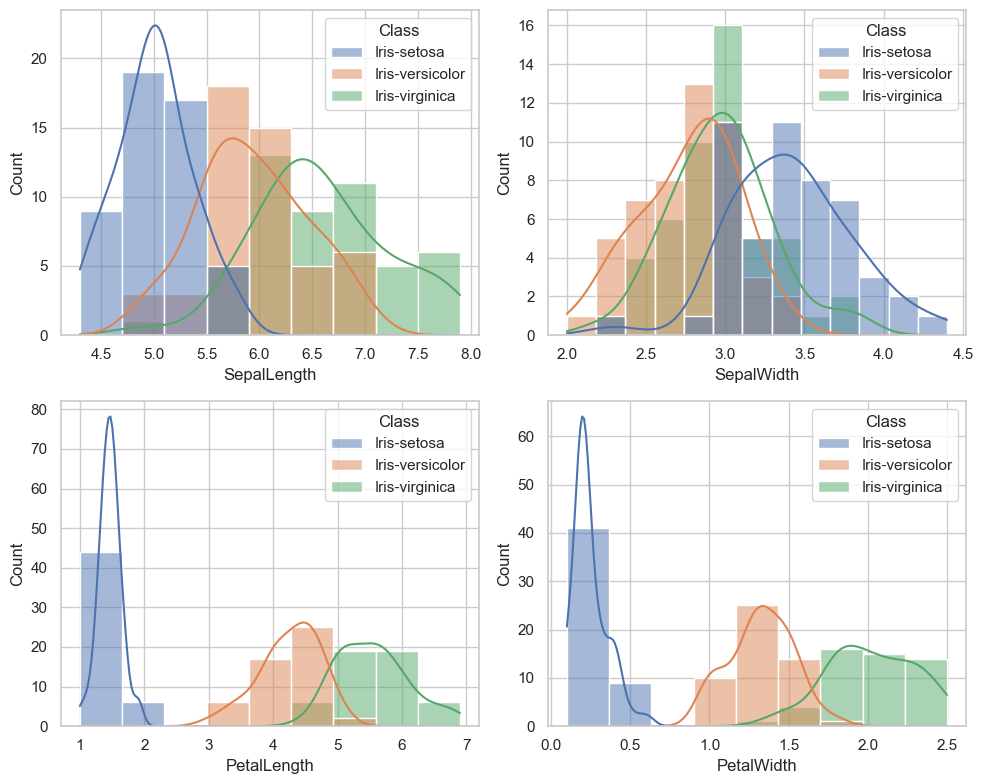

In [28]:
plt.figure(figsize=(10, 8))

# 2x2 grid of histograms
plt.subplot(2, 2, 1)
sns.histplot(data, x="SepalLength", hue="Class", kde=True)
plt.subplot(2, 2, 2)
sns.histplot(data, x="SepalWidth", hue="Class", kde=True)
plt.subplot(2, 2, 3)
sns.histplot(data, x="PetalLength", hue="Class", kde=True)
plt.subplot(2, 2, 4)
sns.histplot(data, x="PetalWidth", hue="Class", kde=True)

plt.tight_layout()
plt.show()


In summary, were you to hand me an iris flower and ask me to allocate it to one of the three given classes, if it had a petal length of less than 2cm and a width narrower than 0.5cm, I would predict it was likely *iris setosa*.

### References
https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
https://blogs.sas.com/content/iml/2012/08/09/discriminating-fishers-iris-data-by-using-the-petal-area
https://seaborn.pydata.org/
https://www.datacamp.com/community/tutorials/histograms-matplotlib
https://realpython.com/visualizing-python-plt-scatter/

# Task 5
***
#### Perform Principal Component Analysis on the iris data set, reducing the number of dimensions to two. Explain the purpose of the analysis and your results
***

Principal component analysis (PCA) is a commonly used technique which transforms high-dimensions data into lower-dimensions while retaining as much information as possible.  In plain English that means it takes data sets which may have a lot of features and simplifies or summarises the data.  For example using a dataset of 100000 people with 25 measurements for each person PCA could 'summarise' those 25 data points into 2 or 3 pertinent figures for each person resulting in a faster analysis of the data set as a whole. Generally speaking, having an abundance of data is advantageous but can mean longer model training times and lead to dimensionality - where the performance of the model deteriorates as the number of features increases. Because PCA produces uncorrelated components, it also neatly deals with multicollinearity which can dilute a models statistical power and render estimates less precise.

PCA reduces the dimensions of the data by projecting it onto lines drawn through the data producing a small number of high-quality indices for use in modelling.  The 'first principal component' is the axis of greatest variation or in simpler terms, the line of best fit. If the line of best fit were a ruler each data points new assigned value would be it's position on that ruler. 

An eigenvector of a square matrix A is a nonzero vector v such that when A is applied to v, the result is a scalar multiple of v. In equation form:

�
�
Av=λvHere, 
�
A is tmatrix, 
�
v is the eigector, and 
�
λ (lambda) is the eigenvalue corresponding to th  As I understand this, in math terms, when you have a matrix and you multiply it by an eigenvector, you get back the same eigenvector, just scaled by the eigenvalue. at eigenvector.

So, when you ly the matrix 
�
A its eigenvector 
�
v, you simply stretch or shrink the vectby the eigenvalue 
λ. The direction of 
�
v remains unchanged.
The eigenvectors of a linear transform,ation are the lines where if a data point started on that line, they end on that line, and the eigenvalue says principal component, etc 

The below code demonstrates the application of Principal Component Analysis (PCA) to a randomly generated 3D dataset and visualises it before and after PCA has been performed. The noticeable difference between the two graphs is the concentration of the data into a lower-dimensional space, simplifying the dataset but still preserving the essential patterns and variability that give the data its meaning. 

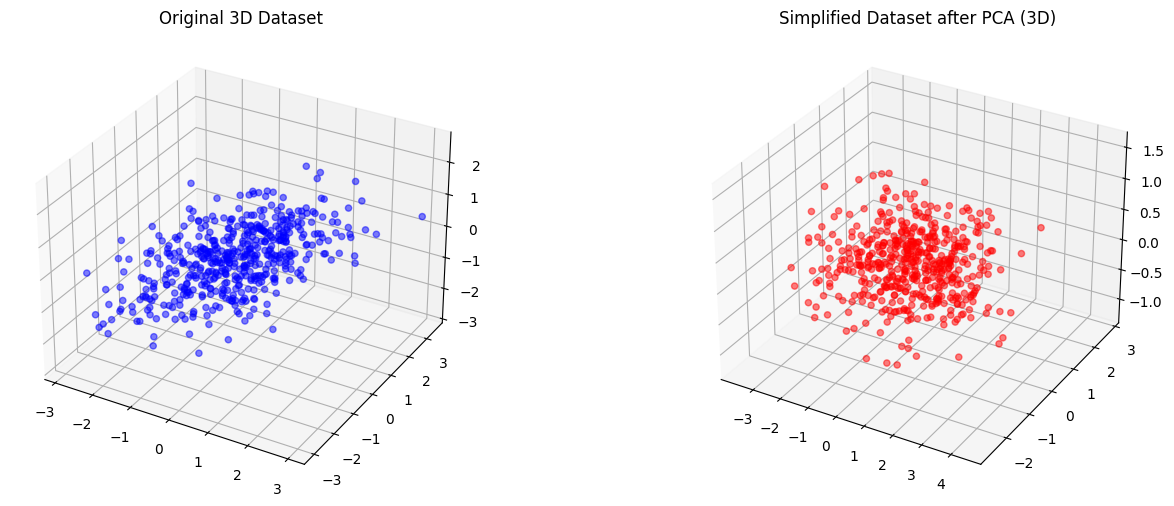

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Generate a random 3D dataset
np.random.seed(42)
data_size = 500
mean = [0, 0, 0]
covariance_matrix = [[1, 0.8, 0.5],  # picked arbitrarily for the purpose of generating a synthetic 3D dataset
                     [0.8, 1, 0.3],
                     [0.5, 0.3, 1]]
data = np.random.multivariate_normal(mean, covariance_matrix, data_size)

# Visualize the original dataset
fig = plt.figure(figsize=(16, 6))

# 3D Scatter plot for the original dataset
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', marker='o', alpha=0.5)
ax1.set_title('Original 3D Dataset')

# Apply PCA to simplify the dataset to 3D
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data)

# Visualize the simplified dataset after PCA in 3D
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c='r', marker='o', alpha=0.5)
ax2.set_title('Simplified Dataset after PCA (3D)')

plt.show()


PCA is clearly most useful for application to high-dimensional datasets, where the number of features is much larger than the number of samples. For a small dataset like the Iris dataset, which consists of 150 samples with four features each, the benefits of performing PCA may be limited but, as can be seen from the code below, still produces results that are easier to interpret. 

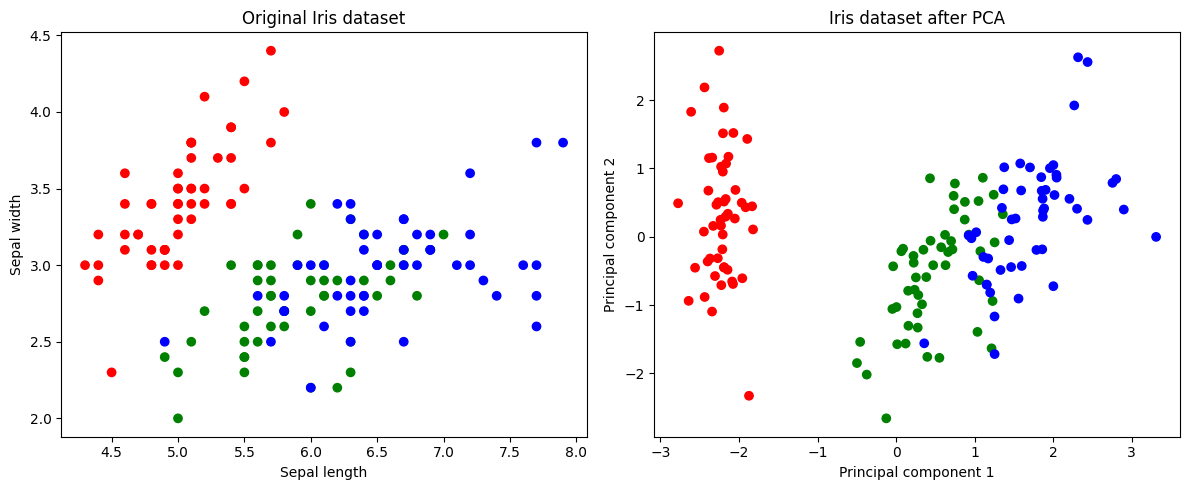

In [17]:
# simplified from https://www.kaggle.com/code/shrutimechlearn/step-by-step-pca-with-iris-dataset ; and
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# load the Iris dataset from a CSV file into a Pandas datafarame
iris_df = pd.read_csv('iris.csv')

# separate features (X) and target variable (y)
X = iris_df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
y = iris_df['Class']

# standardize the features for PCA
X_standardized = StandardScaler().fit_transform(X)

# carry out PCA with 2 components for visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# colour classes
class_colours = {label: color for label, color in zip(y.unique(), ['red', 'green', 'blue'])}

# plot original dataset
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X['SepalLength'], X['SepalWidth'], c=y.map(class_colours))
plt.title('Original Iris dataset')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Vplot dataset after PCA
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.map(class_colours))
plt.title('Iris dataset after PCA')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

# plots side by side
plt.tight_layout()
plt.show()


Standardising is crucial for PCA as it ensures that all features have the same scale - PCA is particularly sensitive to the scale of the variables. PCA is performed with two components for visualisation. This step transforms the standardised features into a new set of uncorrelated variables (principal components). In the second plot, after PCA, the transformed data points are now represented in a new space which is defined by these first two principal components.The dataset has thus been simplified while still retaining its essential information.  The visualisation after PCA makes the dataset easier to interpret as we can now more clearly see the division of the species classes. plots.

### References

https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d
https://statisticsbyjim.com/basics/principal-component-analysis/
https://simple.wikipedia.org/wiki/Eigenvalues_and_eigenvectors